Sistema de Recomendação de Produtos com Inteligência Artificial

Passo 1: Preparação do Ambiente e Leitura da Planilha


In [19]:
import pandas as pd
import os

# Caminho da planilha com o caminho absoluto
caminho_arquivo = r'C:\Users\mycha\OneDrive\Área de Trabalho\teste\Fluxograma para a Automação de Inventário e Estoque\planilha_vendas_profissional - Copia.xlsx'

# Verificar se o arquivo existe
if os.path.exists(caminho_arquivo):
    print("Arquivo encontrado!")
    dados = pd.read_excel(caminho_arquivo)
    print(dados.head())  # Exibindo as primeiras linhas da planilha
else:
    print("Arquivo não encontrado. Verifique o caminho ou o nome do arquivo.")


Arquivo encontrado!
   ID Venda Data da Venda    Produto  Quantidade Vendida  Valor Unitário (R$)  \
0         1    2025-04-01  Produto A                   3                   25   
1         2    2025-04-02  Produto B                   1                   15   
2         3    2025-04-03  Produto A                   5                   25   
3         4    2025-04-04  Produto C                   2                   30   
4         5    2025-04-05  Produto D                   1                   10   

   Valor Total (R$)  Estoque Inicial  Estoque Atual  Lucro por Venda (R$)  
0                75              100             97                    30  
1                15               50             49                    10  
2               125              100             95                    50  
3                60               75             73                    20  
4                10              200            199                     5  


 PASSO 2: Selecionar os Dados de Produtos (Matriz Cliente x Produto)


In [20]:
# Selecionar apenas as colunas dos produtos
produtos = dados.columns[2:]  # Pulando 'ID Cliente' e 'Nome Cliente'

# Criar uma nova matriz somente com os dados de compras (0 e 1)
compras = dados[produtos].copy()

# Mostrar os dados de compras para ver se está tudo certo
print(compras.head())


     Produto  Quantidade Vendida  Valor Unitário (R$)  Valor Total (R$)  \
0  Produto A                   3                   25                75   
1  Produto B                   1                   15                15   
2  Produto A                   5                   25               125   
3  Produto C                   2                   30                60   
4  Produto D                   1                   10                10   

   Estoque Inicial  Estoque Atual  Lucro por Venda (R$)  
0              100             97                    30  
1               50             49                    10  
2              100             95                    50  
3               75             73                    20  
4              200            199                     5  


 PASSO 3: Calcular a Similaridade entre os Produtos


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Garantir que estamos pegando somente as colunas binárias (1 ou 0) para os produtos
compras_binarias = dados.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Calcular a similaridade entre os produtos (baseado nas compras dos clientes)
similaridade_produtos = cosine_similarity(compras_binarias.T)

# Exibir a matriz de similaridade entre os produtos
print(similaridade_produtos)


[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.88724426 0.97289345 0.70397104 0.68933629
  0.96517606]
 [0.         0.88724426 1.         0.91044873 0.77847981 0.7685747
  0.90716598]
 [0.         0.97289345 0.91044873 1.         0.67102466 0.65650916
  0.99499811]
 [0.         0.70397104 0.77847981 0.67102466 1.         0.99979191
  0.68660816]
 [0.         0.68933629 0.7685747  0.65650916 0.99979191 1.
  0.67262617]
 [0.         0.96517606 0.90716598 0.99499811 0.68660816 0.67262617
  1.        ]]


✅ Passo 4: Gerar as Recomendações para o Cliente


In [22]:
# Selecionar as colunas importantes para recomendação (Quantidade Vendida e Produto)
produtos_vendidos = dados[['Produto', 'Quantidade Vendida']]

# Ordenar os produtos por quantidade vendida, em ordem decrescente
produtos_ordenados = produtos_vendidos.sort_values(by='Quantidade Vendida', ascending=False)

# Exibir os produtos recomendados (mais vendidos)
print("🔝 Produtos mais vendidos recomendados:")
print(produtos_ordenados.head(5))


🔝 Produtos mais vendidos recomendados:
     Produto  Quantidade Vendida
2  Produto A                   5
5  Produto B                   4
0  Produto A                   3
3  Produto C                   2
1  Produto B                   1


 Recomendações Baseadas em Lucro


In [23]:
# Selecionar as colunas importantes para recomendação de lucro
produtos_lucro = dados[['Produto', 'Lucro por Venda (R$)']]

# Ordenar os produtos por lucro gerado, em ordem decrescente
produtos_ordenados_lucro = produtos_lucro.sort_values(by='Lucro por Venda (R$)', ascending=False)

# Exibir os produtos com maior lucro
print("🔝 Produtos mais lucrativos recomendados:")
print(produtos_ordenados_lucro.head(5))


🔝 Produtos mais lucrativos recomendados:
     Produto  Lucro por Venda (R$)
2  Produto A                    50
0  Produto A                    30
3  Produto C                    20
5  Produto B                    20
1  Produto B                    10


Análise Visual dos Produtos Mais Vendidos/Lucrativos


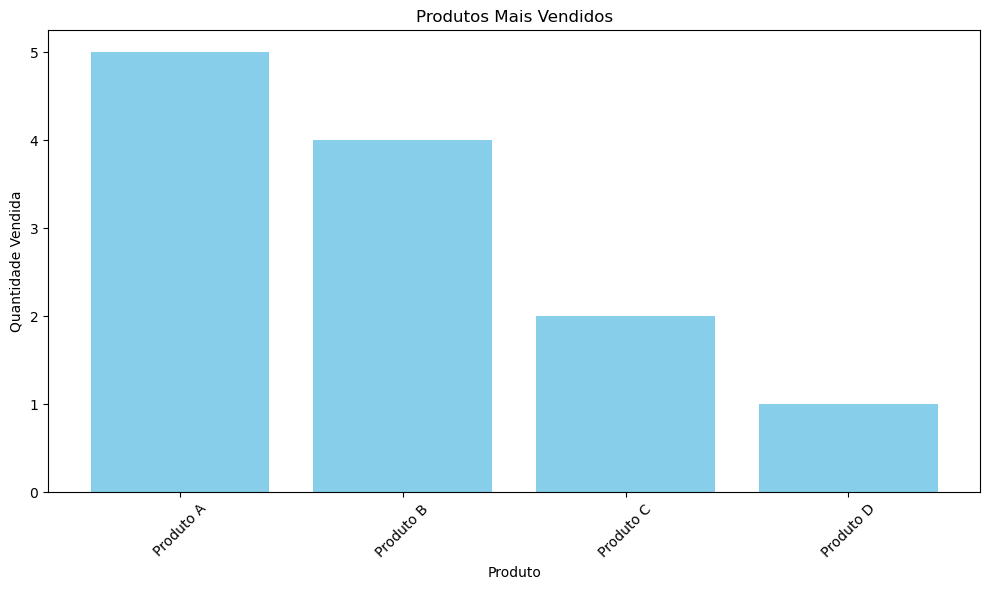

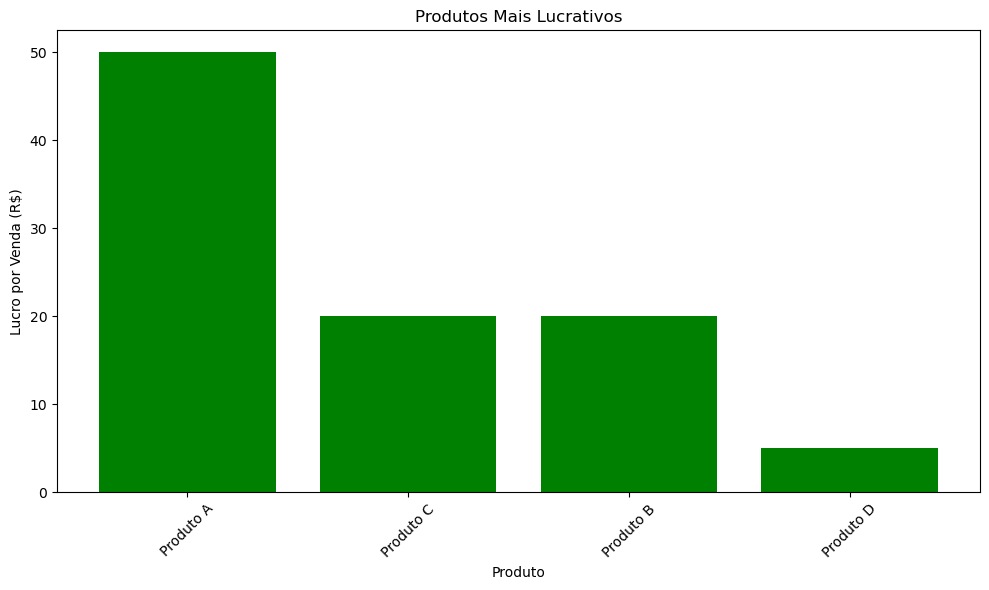

In [24]:
import matplotlib.pyplot as plt

# Gráfico de barras dos produtos mais vendidos
plt.figure(figsize=(10, 6))
plt.bar(produtos_ordenados['Produto'], produtos_ordenados['Quantidade Vendida'], color='skyblue')
plt.title('Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras dos produtos mais lucrativos
plt.figure(figsize=(10, 6))
plt.bar(produtos_ordenados_lucro['Produto'], produtos_ordenados_lucro['Lucro por Venda (R$)'], color='green')
plt.title('Produtos Mais Lucrativos')
plt.xlabel('Produto')
plt.ylabel('Lucro por Venda (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
